1. Evaluar juicios de hipótesis
A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible
rechazar la hipótesis nula.
75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron
como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como
heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La
organización encargada de procesar los datos obtuvo los siguientes resultados:
El 67% de los encuestados por heterosexuales se mostró a favor de la adopción
homoparental, mientras que un 72% de los encuestados por activistas que se identifaron
como homosexuales se mostraron a favor de la adopción homoparental.
Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la
hipótesis alternativa es que existe una diferencia substancial entre ambos.
Con un valor de prueba y un puntaje de corte de 2.58, ¿qué se debe concluir?

Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen
mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia
estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde
contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede
decir sobre su estudio?

Respondidas en clase.

2. Importe la base de datos utilizada la sesión presencial
anterior
Agrege una serie de variables binarias por cada continente de la variable region .
tip: Utilice np.where para ello.
De manera similar a la sesión anterior, enfóquese en las siguientes variables:
Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y
life .
Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y
school .


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv("nations.csv", encoding = "ISO-8859-3", index_col=[0])

In [3]:
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.000000,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.200000,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.200000,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.200000,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.100000,33.299999
6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.750000,NaN
7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.150000,NaN
8,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.200000,NaN
9,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.100000,NaN
10,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.400000,NaN


In [14]:
for i in df['region'].unique():
    df['is_'+str(i)] =np.where(df['region'] == i, 1, 0)

In [11]:
df_tmp =df.loc[:, ['region', 'adfert', 'chldmort', "life"]]

3. Implemente una función de prueba de hipótesis a mano
La función debe ingresar los siguientes argumentos:
df : La tabla de datos.
variable : La variable a analizar.
binarize : El indicador binario a utilizar.
tips:
Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos
con dropna() .
Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
Reporte las medias para cada grupo (0 y 1).
Reporte la diferencia de entre las medias.
Reporte los valores t y p


In [19]:
def hipotesis (df, var, binarize):
    
    tmp=df.copy()
    tmp=tmp.dropna(subset=[var])
    
    unos=tmp[tmp[binarize] ==1]
    ceros=tmp[tmp[binarize]==0]
    
    t, p = stats.ttest_ind(unos[var], ceros[var])
    
    print("t:{} - p:{}".format(t,p))
    
    mediaunos=np.mean(unos[var])
    mediaceros=np.mean(ceros[var])
    
    print("La media de {} del analizado es:{} y la del resto es: {}".format(var, mediaunos, mediaceros))
    print("La diferencia de las medias es:{}".format(mediaunos - mediaceros))
    
hipotesis(df, "life", "is_Europe")    
    

t:6.735355531733241 - p:1.8491610377704372e-10
La media de life del analizado es:76.94573619753815 y la del resto es: 66.38951416520882
La diferencia de las medias es:10.55622203232933


4. Implemente una función que grafique los histogramas para
ambas muestras.
Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la
variable es 1 y 0, respectivamente.
tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot .
Incluya los argumentos alpha y label .
Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por
cada continente, y posteriormente grafique. Concluya con los principales resultados al
respecto.

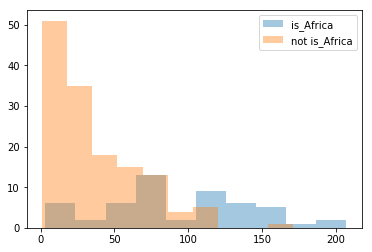

In [23]:
def hist_hipotesis(df, var, binarize):
    
    tmp=df.copy()
    tmp=tmp.dropna(subset=[var])
    
    plt.hist(tmp[tmp[binarize] ==1][var], alpha=0.4, label=binarize)
    plt.hist(tmp[tmp[binarize] ==0][var], label="not {}".format(binarize), alpha=0.4)

    plt.legend()
    plt.show()
hist_hipotesis(df, "adfert", "is_Africa")      

Africa
t:9.444409431356496 - p:1.2481674170069097e-17
La media de adfert del analizado es:92.72115342892133 y la del resto es: 36.83450711361119
La diferencia de las medias es:55.88664631531014



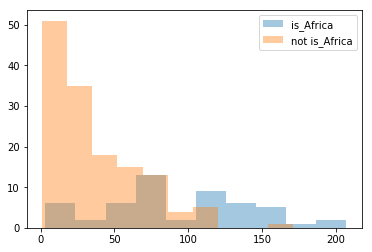

Africa
t:14.17367667788517 - p:1.244572684496239e-31
La media de chldmort del analizado es:109.75 y la del resto es: 24.74822695035461
La diferencia de las medias es:85.0017730496454



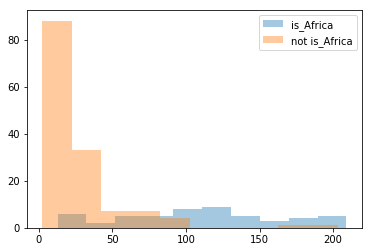

Africa
t:-15.174602759471485 - p:1.0713988391633837e-34
La media de life del analizado es:56.49038454202504 y la del resto es: 73.21114999475614
La diferencia de las medias es:-16.7207654527311



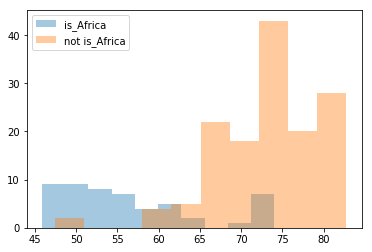

Americas
t:1.7662790555775358 - p:0.07893816171889229
La media de adfert del analizado es:63.659999847412095 y la del resto es: 49.20691819985708
La diferencia de las medias es:14.453081647555017



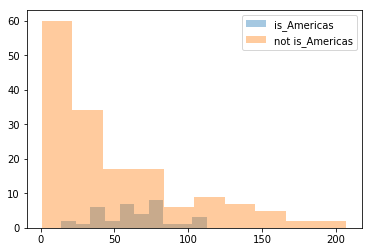

Americas
t:-3.08561941878294 - p:0.00233300081092071
La media de chldmort del analizado es:23.264285714285716 y la del resto es: 53.052215189873415
La diferencia de las medias es:-29.7879294755877



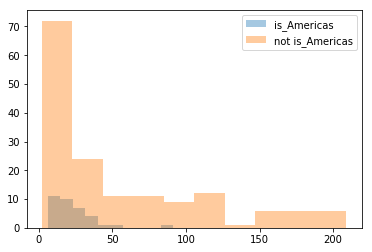

Americas
t:3.138414667252044 - p:0.0019666060685098454
La media de life del analizado es:73.45142800467355 y la del resto es: 67.68983217155409
La diferencia de las medias es:5.761595833119458



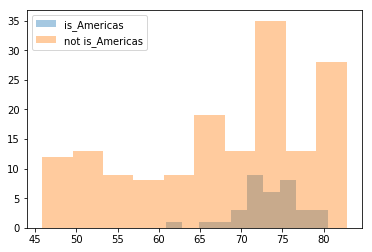

Asia
t:-3.386269877966909 - p:0.0008592686089688165
La media de adfert del analizado es:33.86530622170896 y la del resto es: 57.87999988671007
La diferencia de las medias es:-24.014693665001104



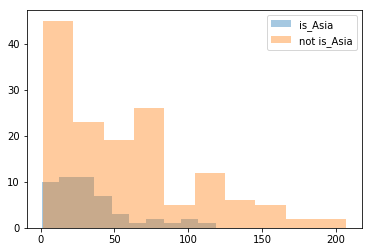

Asia
t:-1.602738386676471 - p:0.1106448646711535
La media de chldmort del analizado es:37.104166666666664 y la del resto es: 51.141379310344824
La diferencia de las medias es:-14.03721264367816



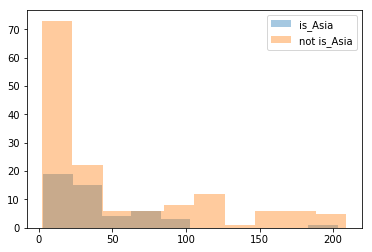

Asia
t:1.7346722179790488 - p:0.08440370105334277
La media de life del analizado es:70.87244882388991 y la del resto es: 68.0050572625522
La diferencia de las medias es:2.867391561337712



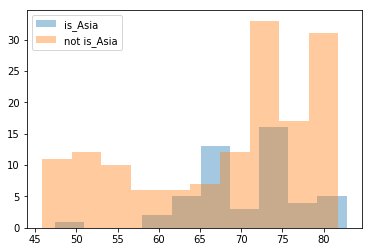

Europe
t:-6.797972597840039 - p:1.3040875269879142e-10
La media de adfert del analizado es:15.53720931396928 y la del resto es: 62.14503303268887
La diferencia de las medias es:-46.607823718719594



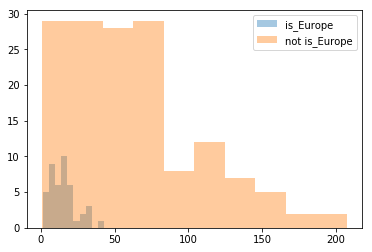

Europe
t:-6.262400472976766 - p:2.4506589890929246e-09
La media de chldmort del analizado es:7.046511627906977 y la del resto es: 59.29
La diferencia de las medias es:-52.243488372093026



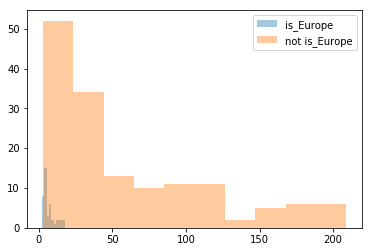

Europe
t:6.735355531733241 - p:1.8491610377704372e-10
La media de life del analizado es:76.94573619753815 y la del resto es: 66.38951416520882
La diferencia de las medias es:10.55622203232933



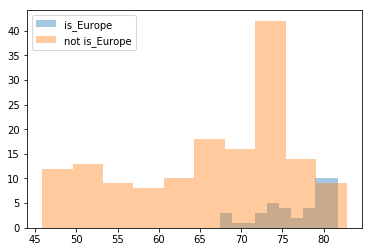

Oceania
t:-0.6231321887004015 - p:0.5339371393742243
La media de adfert del analizado es:44.99333400726322 y la del resto es: 52.38603339847906
La diferencia de las medias es:-7.392699391215835



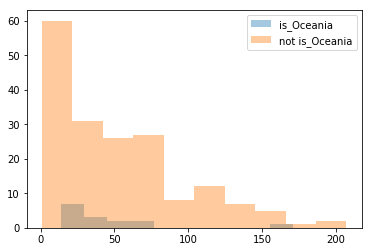

Oceania
t:-0.6277779742677246 - p:0.5308992371716935
La media de chldmort del analizado es:39.416666666666664 y la del resto es: 48.34410112359551
La diferencia de las medias es:-8.927434456928843



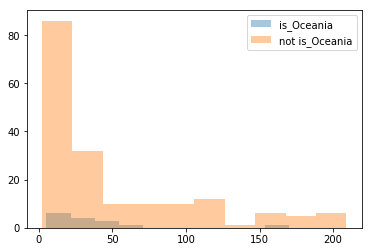

Oceania
t:0.342110739720379 - p:0.7326417413000359
La media de life del analizado es:69.58444468180339 y la del resto es: 68.65763477772973
La diferencia de las medias es:0.9268099040736644



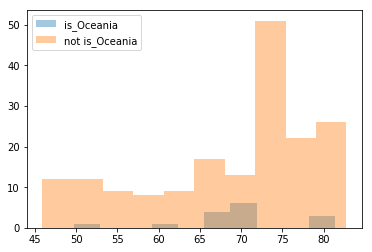

In [24]:
variables = ['adfert', 'chldmort', "life"]

for i in df['region'].unique():
    for j in variables:
        print(i)
        hipotesis(df, j, "is_{}".format(i))
        print()
        hist_hipotesis(df, j, "is_{}".format(i))